<a href="https://colab.research.google.com/github/caltunay/dd_competition_eq_damage_prediction/blob/master/29_08_eq(best_so_far).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
test_vals = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/test_values.csv'

train_vals = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/train_values.csv'
train_labs = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/train_labels.csv'

In [0]:
all = pd.merge(left = pd.read_csv(train_vals), right = pd.read_csv(train_labs), on = 'building_id', how = 'inner')
all.head()
# all = pd.merge(left = pd.read_csv(train_vals), right = pd.read_csv(train_labs), on = 'building_id', how = 'inner')
# all.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [0]:
to_dum = all.select_dtypes('object').columns.tolist()

all = pd.get_dummies(data = all, columns = to_dum, prefix_sep = '|', drop_first = True)

In [0]:
cont_feats = all.drop(labels = 'building_id damage_grade geo_level_3_id geo_level_2_id geo_level_1_id'.split(), axis = 1).nunique().sort_values(ascending = False).index[:5].tolist()

cont_feats

['area_percentage',
 'age',
 'height_percentage',
 'count_families',
 'count_floors_pre_eq']

In [0]:
all[cont_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
count_families,260601.0,0.983949,0.418389,0.0,1.0,1.0,1.0,9.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0


In [0]:
all['age'] = np.clip(a = all['age'], a_max = all['age'].quantile(.99), a_min = 0)

In [0]:
all[cont_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
age,260601.0,21.656229,19.800349,0.0,10.0,15.0,30.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
count_families,260601.0,0.983949,0.418389,0.0,1.0,1.0,1.0,9.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0


In [0]:
# test_series = all['height_percentage'].copy()

# test_series = np.log1p(test_series)

# series_height, bins_height = pd.qcut(x = test_series, q = 2, retbins = True, labels = 'single more'.split())
# series_height.rename('height_binned', inplace = True)

# pd.concat([all,series_height], axis = 1).groupby('height_binned').mean()['damage_grade']
# # series_height = pd.cut(x = all['height_percentage'], bins = [0.0, 5.0, 15.0, 30.0, 100.0], labels = ['new', 'young', 'old', 'ancient'], include_lowest = True)
# # series_age

height_binned
single    2.205288
more      2.284102
Name: damage_grade, dtype: float64

Text(0.5, 1.0, '-0.14097914576002213')

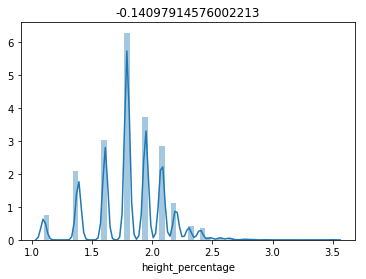

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.distplot(test_series)
plt.title(test_series.skew())

In [0]:
# area_pct 100 sounds off

# series_area, bins_area = pd.qcut(x = all['area_percentage'], q = 4, retbins = True, labels = 'small average large huge'.split())
# series_area.rename('area_pct_binned', inplace = True)

series_area = pd.cut(x = all['area_percentage'], bins = [1.0, 5.0, 9.0, 100.0], labels = ['small', 'average', 'large'], include_lowest = True)
series_area.rename('area_pct_binned', inplace = True)

series_age = pd.cut(x = all['age'], bins = [0.0, 5.0, 15.0, 30.0, 100.0], labels = ['new', 'young', 'old', 'ancient'], include_lowest = True)
series_age.rename('age_binned', inplace = True)


# will only nplog1- height
# series_height, bins_height = pd.qcut(x = all['height_percentage'], q = 4, retbins = True, labels = 'flat mid tall huge'.split())
# series_height.rename('height_binned', inplace = True)

In [0]:
# t = np.clip(all['age'], a_min = all['age'].min(), a_max = all['age'].quantile(.95))
# t.describe()

all_bins = pd.concat([all, series_area, series_age], axis = 1)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

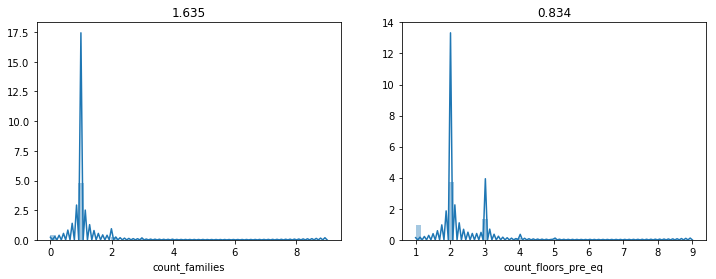

In [0]:
n = 1
plt.figure(figsize = (12,4))
for col in ['count_families', 'count_floors_pre_eq']:
    
    plt.subplot(1,2,n)
    sns.distplot(all_bins[col])
    plt.title(all_bins[col].skew().round(3))
    n+=1

In [0]:
all_bins['count_families'] = np.log1p(all_bins['count_families'])
all_bins['count_floors_pre_eq'] = np.log1p(all_bins['count_floors_pre_eq'])
all_bins['height_percentage'] = np.log1p(all_bins['height_percentage'])

In [0]:
all_bins = all_bins.drop(labels = ['age', 'area_percentage'], axis = 1)

In [0]:
geo_1_map = all_bins.groupby('geo_level_1_id').mean()['damage_grade'].to_dict()
geo_2_map = all_bins.groupby('geo_level_2_id').mean()['damage_grade'].to_dict()
geo_3_map = all_bins.groupby('geo_level_3_id').mean()['damage_grade'].to_dict()

In [0]:
all_bins['geo_level_1_id'] = all_bins['geo_level_1_id'].map(geo_1_map)
all_bins['geo_level_2_id'] = all_bins['geo_level_2_id'].map(geo_2_map)
all_bins['geo_level_3_id'] = all_bins['geo_level_3_id'].map(geo_3_map)

In [0]:
to_dum2 = 'area_pct_binned age_binned'.split()

all_bins = pd.get_dummies(data = all_bins, columns = to_dum2, prefix_sep = '|', drop_first = True)

In [0]:
all_bins.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,area_pct_binned|average,area_pct_binned|large,age_binned|young,age_binned|old,age_binned|ancient
0,802906,2.161724,2.740741,2.837838,1.098612,1.791759,1,1,0,0,0,0,0,0,0,0,0,0.693147,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,28830,2.485273,2.487437,2.062500,1.098612,2.079442,0,1,0,0,0,0,0,0,0,0,0,0.693147,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,94947,2.563369,2.518750,2.580882,1.098612,1.791759,0,1,0,0,0,0,0,0,0,0,0,0.693147,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,590882,2.000960,2.107317,2.096774,1.098612,1.791759,0,1,0,0,0,0,1,1,0,0,0,0.693147,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,201944,2.337713,2.348748,2.368852,1.386294,2.302585,1,0,0,0,0,0,0,0,0,0,0,0.693147,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ssx = StandardScaler()

In [0]:
all_bins.drop(labels = ['building_id', 'damage_grade'], axis = 1).nunique().sort_values(ascending = False).index[:6].tolist()

['geo_level_3_id',
 'geo_level_2_id',
 'geo_level_1_id',
 'height_percentage',
 'count_families',
 'count_floors_pre_eq']

In [0]:
scaled_cols = all_bins.drop(labels = ['building_id', 'damage_grade'], axis = 1).nunique().sort_values(ascending = False).index[:6].tolist()

df_scale = all_bins[scaled_cols]
df_remainder = all_bins.drop(labels = scaled_cols, axis = 1)

df_scale = pd.DataFrame(ssx.fit_transform(df_scale), columns = scaled_cols)

all_clean = pd.concat([df_remainder, df_scale], axis = 1)

**Submission DF PreProcessing**

In [0]:
submis_eq = pd.get_dummies(data = pd.read_csv(test_vals), columns = to_dum, prefix_sep = '|', drop_first = True)



submis_eq.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w
0,300051,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
# series_area = pd.cut(x = all['area_percentage'], bins = [1.0, 5.0, 9.0, 100.0], labels = ['small', 'average', 'large'], include_lowest = True)
# series_area.rename('area_pct_binned', inplace = True)

# series_age = pd.cut(x = all['age'], bins = [0.0, 5.0, 15.0, 30.0, 100.0], labels = ['new', 'young', 'old', 'ancient'], include_lowest = True)
# series_age.rename('age_binned', inplace = True)



test_series_area = pd.cut(x = submis_eq['area_percentage'], bins = [1.0, 5.0, 9.0, 100.0], labels = ['small', 'average', 'large'], include_lowest = True)
test_series_area.rename('area_pct_binned', inplace = True)

test_series_age = pd.cut(x = submis_eq['age'], bins = [0.0, 5.0, 15.0, 30.0, 100.0], labels = ['new', 'young', 'old', 'ancient'], include_lowest = True)
test_series_age.rename('age_binned', inplace = True)


# Height needs np.log1p 

# test_series_height = pd.cut(x = submis_eq['height_percentage'], bins = bins_height, labels = 'flat mid tall huge'.split(), include_lowest = True)
# test_series_height.rename('height_binned', inplace = True)

In [0]:
submis_eq_dums = pd.concat([submis_eq, test_series_area, test_series_age], axis = 1)

submis_eq_dums = pd.get_dummies(data = submis_eq_dums, columns = to_dum2, prefix_sep = '|', drop_first = True)

In [0]:
submis_eq_dums = submis_eq_dums.drop(labels = 'age area_percentage'.split(), axis = 1)

In [0]:
submis_eq_dums['geo_level_1_id'] = submis_eq_dums['geo_level_1_id'].map(geo_1_map)
submis_eq_dums['geo_level_2_id'] = submis_eq_dums['geo_level_2_id'].map(geo_2_map)
submis_eq_dums['geo_level_3_id'] = submis_eq_dums['geo_level_3_id'].map(geo_3_map)

In [0]:
submis_eq_dums.isnull().sum().sort_values(ascending = False)

In [0]:
submis_eq_dums['geo_level_2_id'] = submis_eq_dums['geo_level_2_id'].fillna(value = submis_eq_dums['geo_level_2_id'].mean())

submis_eq_dums['geo_level_3_id'] = submis_eq_dums['geo_level_3_id'].fillna(value = submis_eq_dums['geo_level_3_id'].mean())

In [0]:
submis_eq_dums.isnull().sum().sum()

0

In [0]:
submis_eq_dums['count_families'] = np.log1p(submis_eq_dums['count_families'])
submis_eq_dums['count_floors_pre_eq'] = np.log1p(submis_eq_dums['count_floors_pre_eq'])
submis_eq_dums['height_percentage'] = np.log1p(submis_eq_dums['height_percentage'])

In [0]:
# scaled_cols = all_bins.drop(labels = ['building_id', 'damage_grade'], axis = 1).nunique().sort_values(ascending = False).index[:5].to_list()

# df_scale = all_bins[scaled_cols]
# df_remainder = all_bins.drop(labels = scaled_cols, axis = 1)

# df_scale = pd.DataFrame(ssx.fit_transform(df_scale), columns = scaled_cols)

# all_clean = pd.concat([df_remainder, df_scale], axis = 1)


submis_scaled = submis_eq_dums[scaled_cols]
submis_remainder = submis_eq_dums.drop(labels = scaled_cols, axis = 1)

submis_scaled = pd.DataFrame(ssx.transform(submis_scaled), columns = scaled_cols)
submis_clean = pd.concat([submis_remainder, submis_scaled], axis = 1)

submis_clean.head()

,building_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,area_pct_binned|average,area_pct_binned|large,age_binned|young,age_binned|old,age_binned|ancient,geo_level_3_id,geo_level_2_id,geo_level_1_id,height_percentage,count_families,count_floors_pre_eq
0,300051,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.985618,1.304617,1.934396,0.435463,0.139372,1.177992
1,99355,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,-0.597105,-0.160494,-0.266221,-0.099082,0.139372,-0.068990
2,890251,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.908874,-0.176848,-0.825332,-0.099082,0.139372,-0.068990
3,745817,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,-2.005997,-1.973508,-1.764600,-1.505104,1.954200,-1.826513
4,421793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1.466642,1.260130,1.934396,0.898506,0.139372,1.177992


In [0]:
# sns.heatmap(all_clean.drop(labels = 'building_id', axis = 1).corr(), cmap = 'plasma', square = True)

temp_df = pd.DataFrame(all_clean.drop(labels = 'building_id', axis = 1).corr().abs().unstack()).reset_index()


In [0]:
temp2 = temp_df[temp_df[0] != 1].sort_values(by = 0, ascending = False)

temp2[temp2['level_0'] == 'damage_grade']

,level_0,level_1,0
1466,damage_grade,geo_level_3_id,0.652235
1467,damage_grade,geo_level_2_id,0.584784
1468,damage_grade,geo_level_1_id,0.469974
1434,damage_grade,foundation_type|r,0.343355
1440,damage_grade,ground_floor_type|v,0.318720
1409,damage_grade,has_superstructure_mud_mortar_stone,0.291325
1438,damage_grade,roof_type|x,0.280106
1433,damage_grade,foundation_type|i,0.263901
1413,damage_grade,has_superstructure_cement_mortar_brick,0.254131
1444,damage_grade,other_floor_type|s,0.226820


In [0]:
all_clean.columns.tolist()

['building_id',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'damage_grade',
 'land_surface_condition|o',
 'land_surface_condition|t',
 'foundation_type|i',
 'foundation_type|r',
 'foundation_type|u',
 'foundation_type|w',
 'roof_type|q',
 'roof_type|x',
 'ground_floor_type|m',
 'ground_floor_type|v',
 'grou

**Modelling starts here**

In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam


from sklearn.model_selection import train_test_split as tts, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [0]:
all_clean['damage_grade'].value_counts(normalize = False)

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [0]:
x = all_clean.drop(labels = 'building_id damage_grade'.split(), axis = 1).values
y_keras = pd.get_dummies(data = all_clean[['damage_grade']], columns = ['damage_grade'], prefix = '', prefix_sep = '')
y_keras.head()

,1,2,3
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [0]:
x_train, x_test, y_train, y_test = tts(x, y_keras, test_size = .25, random_state = 42)

In [0]:
x_train.shape

(195450, 63)

(195450, 63)

In [0]:
model = Sequential()

model.add(Dense(output_dim = 60, input_dim = 63, activation = 'relu'))
model.add(Dense(output_dim = 90, activation = 'relu'))
# model.add(Dense(output_dim = 90, activation = 'relu'))
model.add(Dense(output_dim = 40, activation = 'relu'))
model.add(Dense(output_dim = 9, activation = 'relu'))
model.add(Dense(output_dim = 3, activation = 'softmax'))

# sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = Adam(lr = 0.001, decay = 1e-6), metrics = ['accuracy'], loss = 'categorical_crossentropy')

model.fit(x_train, y_train, epochs = 180, batch_size = 13030)

print(classification_report(y_test_t['heart_disease_present'].astype(int), pd.DataFrame(pd.DataFrame(model.predict(x_test),columns = [1,2,3]).idxmax(axis = 1), columns = ['heart_disease_present'])['heart_disease_present'].astype(int)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=63, activation="relu", units=60)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=90)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  


Epoch 1/180
195450/195450 [==============================] - 2s 12us/step - loss: 0.9163 - acc: 0.6488
Epoch 2/180
195450/195450 [==============================] - 0s 2us/step - loss: 0.7211 - acc: 0.7019
Epoch 3/180
195450/195450 [==============================] - 0s 2us/step - loss: 0.6611 - acc: 0.7118
Epoch 4/180
195450/195450 [==============================] - 0s 2us/step - loss: 0.6347 - acc: 0.7175
Epoch 5/180
195450/195450 [==============================] - 0s 2us/step - loss: 0.6232 - acc: 0.7198
Epoch 6/180
195450/195450 [==============================] - 0s 2us/step - loss: 0.6165 - acc: 0.7206
Epoch 7/180
195450/195450 [==============================] - 0s 2us/step - loss: 0.6116 - acc: 0.7210
Epoch 8/180
195450/195450 [==============================] - 0s 2us/step - loss: 0.6075 - acc: 0.7211
Epoch 9/180
195450/195450 [==============================] - 0s 2us/step - loss: 0.6042 - acc: 0.7230
Epoch 10/180
195450/195450 [==============================] - 0s 2us/step - loss:

In [0]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)


# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

# X = x.copy()
# Y = y_keras.copy()

for train, test in kfold.split(X, Y):
    
    x = all_clean.drop(labels = 'building_id damage_grade'.split(), axis = 1).values
    y_keras = pd.get_dummies(data = all_clean[['damage_grade']], columns = ['damage_grade'], prefix = '', prefix_sep = '')
    
    # create model
    model = Sequential()
    model.add(Dense(output_dim = 60, input_dim = 63, activation = 'relu'))
    model.add(Dense(output_dim = 90, activation = 'relu'))
    # model.add(Dense(output_dim = 90, activation = 'relu'))
    model.add(Dense(output_dim = 40, activation = 'relu'))
    model.add(Dense(output_dim = 9, activation = 'relu'))
    model.add(Dense(output_dim = 3, activation = 'softmax'))
	# Compile model
    model.compile(optimizer = Adam(lr = 0.001, decay = 1e-6), metrics = ['accuracy'], loss = 'categorical_crossentropy')
	
    # Fit the model
    model.fit(X[train], Y[train], epochs=150, batch_size=13030, verbose=0)
	
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
	
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

ValueError: ignored

In [0]:
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_keras.values, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

d_class_weights

{0: 3.4575306479859895, 1: 0.5859138399692431, 2: 0.9959756013666904}

In [0]:
submis_df = pd.concat([submis_clean['building_id'], pd.DataFrame(pd.DataFrame(model.predict(submis_clean.drop(labels = 'building_id', axis = 1).values), columns = [1,2,3]).idxmax(axis=1), columns = ['damage_grade'])], axis = 1).set_index('building_id')

submis_df.to_csv('submission_eq5.csv')